In [1]:
import json
import os

import importlib
import pandas as pd
import pyperclip as clip

import Functions as F

In [2]:
importlib.reload(F)
# get the latest data
JS = F.JokeStory('joke_data2.json') # joke_data.json -> finish until 130 (start from 131)
if len(JS.story.dropna()) > 0:
    # get the latest 10 aggregated data
    data = pd.merge(JS.joke, JS.story, how='right', on='id')
else:
    data = JS.joke

data.dropna().tail(1)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=260967290589-b75u6164vnmki0764bf4og1hhrrqn27b.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50405%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocuments+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.file+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.upload+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=DNAsM6QyM0GuE22VJLnKdyA7eXaJGC&access_type=offline


id                                               joke    origin_id  \
9  1129  Every night at 11:11, I make a wish that someo...  8p49pWvcxAd   

   culture        category                                        description  \
9  General  icanhazdadjoke  The irony of wishing for a fixed clock at the ...   

           title c1_name c2_name c1_gender  ...  \
9  Broken Wishes    John    Ella      male  ...   

                                     c1_2            c2_2  \
9  That someone will fix my broken clock.  That's ironic.   

                                n_3                        c1_3  \
9  Ella laughs and shakes her head.  I guess I'll keep wishing.   

                        c2_3                        n_4  \
9  Maybe one day it'll work.  They both laugh together.   

                       c1_4            c2_4  \
9  Until then, 11:11 it is.  Happy wishing!   

                                         script_flow          image_id  
9  [n_1, c1_1, c2_1, n_2, c1_2, c2_2, n_3, c1_3, ...  UdvxRK4CCg32fRgl  

[1 rows x 25 columns]

### Code 101&102: Generate Story and Images

In [23]:
### Story Prompts
p1 = F.prompt1(JS.get_next_joke())
print(JS.get_next_joke())
# copy prompt to clipboard
clip.copy(p1)

What do you get if you put a duck in a cement mixer? Quacks in the pavement.


In [24]:
### Image Prompts
p2 = F.prompt2()
# copy prompt to clipboard
clip.copy(p2)

In [25]:
### Update Story Data
with open('story_script.json', 'r', encoding='utf-8') as f:
    story_script = json.load(f)
# update data
story = JS.save_story_data(story_script)
# rename, relocate, and convert to png format
result = JS.image_preprocess()
if result['status'] == 'success':
    # create a new google docs
    doc_id = JS.google.create_docs(result['message'])
    print(doc_id)
else:
    print(result['message'])

# JS.convert_webp_to_png()

Success: Story Data Updated
Success: Image Preprocessing
Success: New Docs Created
{'1137_QuackyPavement': '1a-cnved9UhdI11vT9T0wfSPGxv1e9m7KNoASVGLKwzo'}


### Code 104: SNS Messages

In [14]:
# Get the list of documentId; return {"id_title": "documentId"}
doc_ids = dict(sorted(JS.google.list_docs().items()))

F.prompt3(doc_ids)

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1120_DogvsDucks.json' and branch: 'main'
  - documentId: 18Cd4-xv1hxk8RIZYOVbqBSGmaAsLNr0bkDdaF22XHuU
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1121_NailedIt.json' and branch: 'main'
  - documentId: 1KkKTjgBQJjhrN_sFrTPc7FrcjobLkGawD-n8WlWs-MM
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1122_PumpkinSquash.json' and branch: 'main'
  - documentId: 1fbk-NrgdebUXDi3ew9UGV6x3FpHvYlA4fCMMRneMmKY
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. 

x

### Video Creation

In [15]:
# Define ids of video to be generated
ID_LIST = [i for i in range(1120, 1130)]
# Crop mode
CROP_MODE = 'auto'

In [16]:
importlib.reload(F)
# Create video class object
video = F.Video(JS)
# generate expected crop mode (change 'manual' if necessary after observing image cropping test)
exp_crop_mode = str({id_: CROP_MODE for id_ in ID_LIST})
clip.copy(exp_crop_mode)

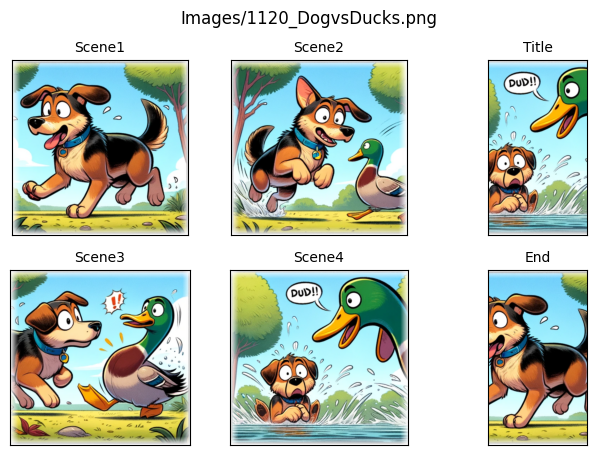

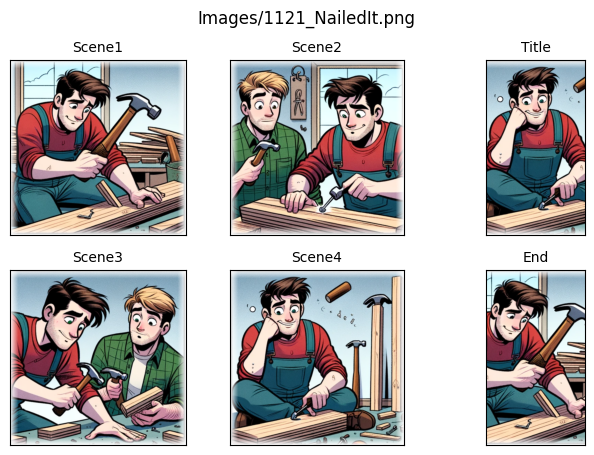

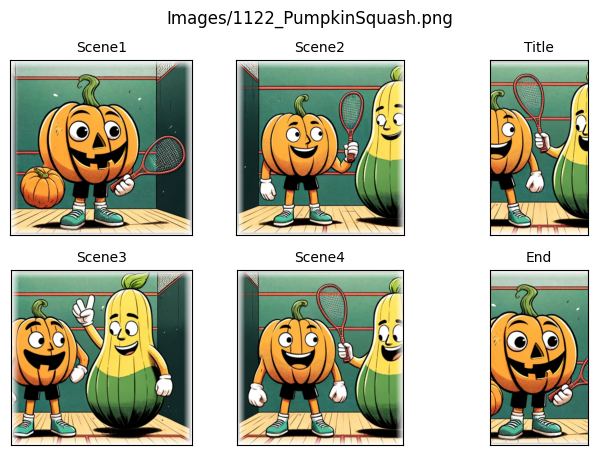

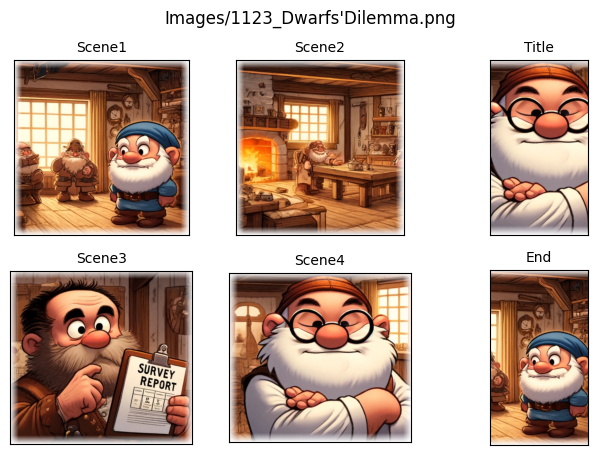

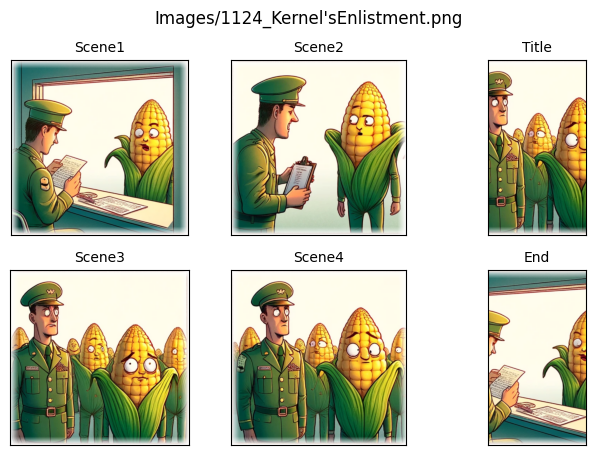

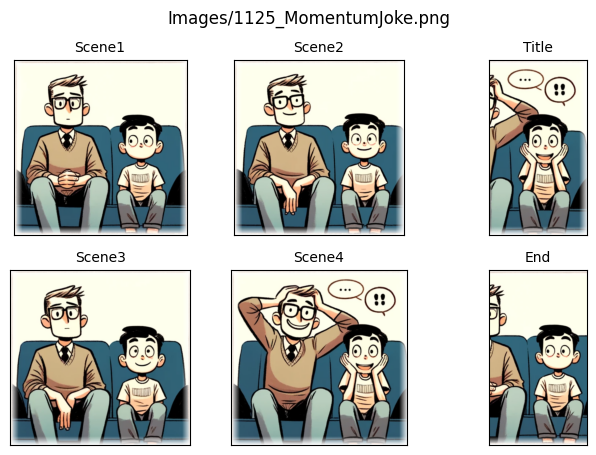

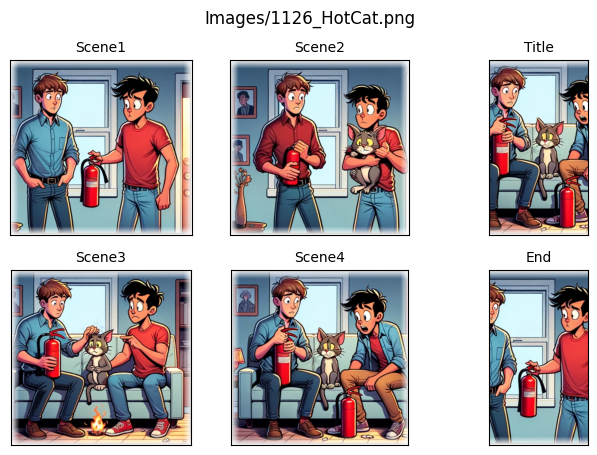

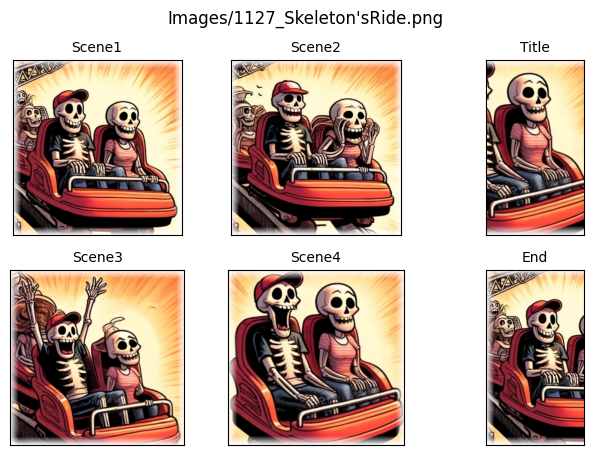

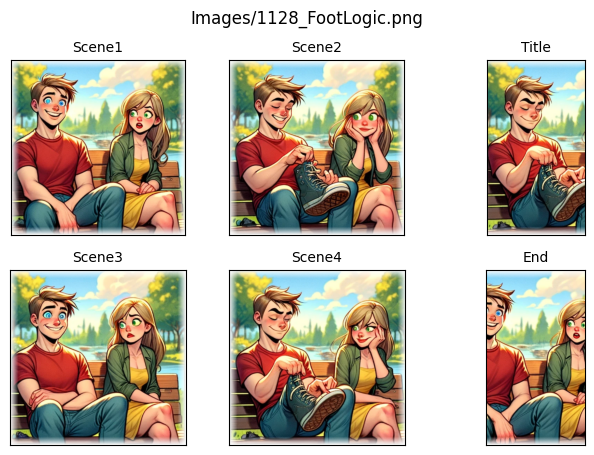

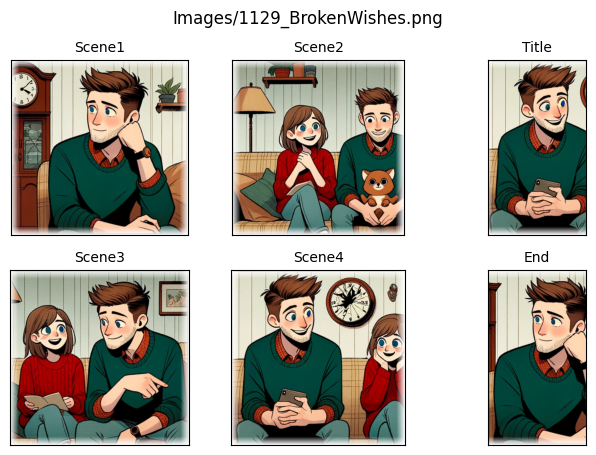

In [17]:
# Get list of image paths
args = [{'path': f"Images/{p}", 'mode': CROP_MODE} for p in os.listdir('Images') if int(p.split('_')[0]) in ID_LIST]

# Test image cropping
video.image_crop_test(args)

In [19]:
# confirmation
confirm = input("Did you check the four-panel image and 'crop_image'? If so answer 'y'.")

# copy the crop mode dictionary here 'auto' or 'manual'
crop_mode = {1120: 'auto', 1121: 'auto', 1122: 'auto', 1123: 'auto', 1124: 'auto', 1125: 'auto', 1126: 'auto', 1127: 'auto', 1128: 'auto', 1129: 'auto'}

if confirm == 'y':
    video_names = video.generate_video(id_list=ID_LIST, t_interval = 60, crop_mode=crop_mode) 
    # successfully generated video names
print(video_names)

1120_DogvsDucks has already existed!
1121_NailedIt has already existed!
1122_PumpkinSquash has already existed!
Moviepy - Building video Videos/1123_Dwarfs'Dilemma.mp4.
MoviePy - Writing audio in 1123_Dwarfs'DilemmaTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1123_Dwarfs'Dilemma.mp4



Moviepy - Done !
Moviepy - video ready Videos/1123_Dwarfs'Dilemma.mp4
Moviepy - Building video Videos/1124_Kernel'sEnlistment.mp4.
MoviePy - Writing audio in 1124_Kernel'sEnlistmentTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1124_Kernel'sEnlistment.mp4



Moviepy - Done !
Moviepy - video ready Videos/1124_Kernel'sEnlistment.mp4
Moviepy - Building video Videos/1125_MomentumJoke.mp4.
MoviePy - Writing audio in 1125_MomentumJokeTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1125_MomentumJoke.mp4



Moviepy - Done !
Moviepy - video ready Videos/1125_MomentumJoke.mp4
Moviepy - Building video Videos/1126_HotCat.mp4.
MoviePy - Writing audio in 1126_HotCatTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1126_HotCat.mp4



Moviepy - Done !
Moviepy - video ready Videos/1126_HotCat.mp4
Moviepy - Building video Videos/1127_Skeleton'sRide.mp4.
MoviePy - Writing audio in 1127_Skeleton'sRideTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1127_Skeleton'sRide.mp4



Moviepy - Done !
Moviepy - video ready Videos/1127_Skeleton'sRide.mp4
Moviepy - Building video Videos/1128_FootLogic.mp4.
MoviePy - Writing audio in 1128_FootLogicTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1128_FootLogic.mp4



Moviepy - Done !
Moviepy - video ready Videos/1128_FootLogic.mp4
Moviepy - Building video Videos/1129_BrokenWishes.mp4.
MoviePy - Writing audio in 1129_BrokenWishesTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1129_BrokenWishes.mp4



Moviepy - Done !
Moviepy - video ready Videos/1129_BrokenWishes.mp4
["1123_Dwarfs'Dilemma", "1124_Kernel'sEnlistment", '1125_MomentumJoke', '1126_HotCat', "1127_Skeleton'sRide", '1128_FootLogic', '1129_BrokenWishes']


### Video Schedule Post

In [24]:
import re
def camel_to_normal(text):
    # Split on all non-initial capital letters or non-letter characters that are followed by a capital letter
    split_text = re.sub('([a-z0-9])([A-Z])', r'\1 \2', text)
    return split_text

In [25]:
# list docs of video description
v_docs = JS.google.list_docs()
# get the publish time
current_schedule = JS.google.get_scheduled_videos()
new_schedule = JS.google.get_new_schedules(list(current_schedule), num_videos=len(v_docs))

v_titles, v_contents, v_tags, v_paths, v_schedules = [], [], [], [], []
# traverse all docs
for i, (id_title, docs_id) in enumerate(v_docs.items()):
    # title
    v_titles.append(f"Joke Story: {camel_to_normal(id_title.split('_')[1])}")
    # content
    v_contents.append(JS.google.get_doc_content(docs_id))
    # tags
    v_tags.append({}) 
    # path
    v_paths.append(f"Videos/{id_title}.mp4")
    # scheduled time
    v_schedules.append(new_schedule[i])

# final check of the video schedule
pd.DataFrame({
    'Title': v_titles,
    'Content': v_contents[:20], # first 20 characters
    #'Tags': v_tags,
    'Path': v_paths,
    'Schedule': v_schedules
})

Success: No scheduled videos are found


Title  \
0          Joke Story: Dogvs Ducks   
1            Joke Story: Nailed It   
2       Joke Story: Pumpkin Squash   
3       Joke Story: Dwarfs'Dilemma   
4  Joke Story: Kernel's Enlistment   
5        Joke Story: Momentum Joke   
6              Joke Story: Hot Cat   
7      Joke Story: Skeleton's Ride   
8           Joke Story: Foot Logic   
9        Joke Story: Broken Wishes   

                                             Content  \
0  📽️ Video Description 📽️: \nJoin Rex the dog as...   
1  📽️ Video Description 📽️: \nWatch Bob and Sam h...   
2  📽️ Video Description 📽️: \nJoin Pumpkin and Sq...   
3  📽️ Video Description 📽️: \nExperience the whim...   
4  📽️ Video Description 📽️: \nDive into the hilar...   
5  📽️ Video Description 📽️: \nEnjoy the funny mom...   
6  📽️ Video Description 📽️: \nLaugh out loud with...   
7  📽️ Video Description 📽️: \nJoin Bones and Skul...   
8  📽️ Video Description 📽️: \nLaugh along with Sa...   
9  📽️ Video Description 📽️: \nJoin John and Ella ...   

                                 Path              Schedule  
0          Videos/1120_DogvsDucks.mp4  2024-06-10T12:00:00Z  
1            Videos/1121_NailedIt.mp4  2024-06-10T13:00:00Z  
2       Videos/1122_PumpkinSquash.mp4  2024-06-11T12:00:00Z  
3      Videos/1123_Dwarfs'Dilemma.mp4  2024-06-11T13:00:00Z  
4  Videos/1124_Kernel'sEnlistment.mp4  2024-06-12T12:00:00Z  
5        Videos/1125_MomentumJoke.mp4  2024-06-12T13:00:00Z  
6              Videos/1126_HotCat.mp4  2024-06-13T12:00:00Z  
7      Videos/1127_Skeleton'sRide.mp4  2024-06-13T13:00:00Z  
8           Videos/1128_FootLogic.mp4  2024-06-14T12:00:00Z  
9        Videos/1129_BrokenWishes.mp4  2024-06-14T13:00:00Z

In [6]:
# post_video
import time
for i in range(len(v_titles)):
    result = JS.google.post_video(v_titles[i], v_contents[i], v_tags[i], v_paths[i], v_schedules[i])
    print(result)
    time.sleep(5)

{'status': 'success', 'videoId': '5EXTW4h6Lgs'}
{'status': 'success', 'videoId': 'G5msWFLfIAw'}
{'status': 'success', 'videoId': 'nUEqHn38oD0'}
{'status': 'success', 'videoId': 'Ko5SHISIV6w'}


In [27]:
# if the quote reaches to the maximum in YouTube Data API
#  copy and paste, then execute the above cell again.
start_idx = 6
print(f"""
v_titles = {v_titles[start_idx:]}
v_contents = {v_contents[start_idx:]}
v_tags = {v_tags[start_idx:]}
v_paths = {v_paths[start_idx:]}
v_schedules = {v_schedules[start_idx:]}
""")


v_titles = ['Joke Story: Hot Cat', "Joke Story: Skeleton's Ride", 'Joke Story: Foot Logic', 'Joke Story: Broken Wishes']
v_contents = ["📽️ Video Description 📽️: \nLaugh out loud with Tom and Jerry in 'Hot Cat'! 😂 Witness their hilarious escapades as they deal with a mysteriously hot cat. Will they figure out what's going on? Find out in this fun-filled adventure! 🐱🔥\n\n🏫 English Explanation 🗣️: \nQuery: A request for information, usually in a database or search engine.\nMiscommunication: When communication goes wrong, often leading to humor in stories.\nDigital: Related to technology or computers, setting the modern scene.\nSearch: The act of looking for information online or in a database.\nPrompt: A command or question given to a computer to trigger a response.\n\n#shorts #LearnEnglish #StudyEnglish #Humor #Funny #Joke #ShortStory #1min #Anglais #AprenderInglés #ingles #英語学習 #英語 #学英语 #英语学习 #영어학습지 \n", "📽️ Video Description 📽️: \nJoin Bones and Skully in 'Skeleton's Ride'! 🚴\u200d♂️💀

### Code 100: Generate Jokes

#### Joke Prompts

In [3]:
JS.joke_prompts(culture_opt='General', category_opt='Valentine', number=10)

Activate 'Code 100'.
Return only code snippet of CSV format.
Make sure that each row of output data has three values; culture(str), category(str), and the generated joke(str).
Retrieve the existing jokes without **decoding** and **analyzing** them, and make sure no duplicated sentence of jokes.

Here is the list of prompts; generate a creative and unique joke per prompts.
["Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Val

#### Update Joke Data

In [ ]:
# update data
raw_csv = """

"""

joke = JS.update_joke_data(raw_csv)
joke.tail()

id  culture   category  \
185  185  General  Valentine   
186  186  General  Valentine   
187  187  General  Valentine   
188  188  General  Valentine   
189  189  General  Valentine   

                                                  joke  
185  What's a chocolate's favorite kind of music on...  
186  Why was the chocolate box nervous on Valentine...  
187  How do chocolates stay fit for Valentine's Day...  
188  What did the chocolate say to the Valentine's ...  
189  Why did the chocolate give his girlfriend a bo...

In [14]:
joke = pd.read_json('joke_data.json')
joke['id'] = [i for i in range(len(joke))]
joke.tail()

id  culture             category  \
157  157  General  Observational humor   
158  158  General       Wordplay jokes   
159  159  General         Animal jokes   
160  160  General         Doctor jokes   
161  161  General     Technology jokes   

                                                  joke  
157  Isn't it funny how we never see snowmen at the...  
158  If April showers bring May flowers, what do Ma...  
159  Why don’t polar bears get married in winter? B...  
160  Why do doctors make the worst snowmen? Because...  
161  Why did the smartphone wear a scarf? Because i...

In [15]:
joke.to_json('joke_data.json', orient='records', indent=4)

### Code 103: Images for Title and End

In [ ]:
story = JS.story.dropna().iloc[-1]
joke_id = f"{story['id']:03d}"
img_title = f"{story['title'].replace(' ', '')}"
outputs = [f"{joke_id}_{img_title}", f"{joke_id}_title.png", f"{joke_id}_end.png"]

# get the path to the story script
path = f"Stories/{joke_id}_{img_title}.json"
#img_params = {"size": "1024x1792", "quality": "hd"}
print(f"""Activate Code '103':
- Image must be "1024x1792" size without any words.
- Two images must be suitable to the story of {story['title']} that we are focusing on; please referring to the latest story scripts.
- Precisely follow the four steps outlined in "actions" component.""")
outputs